In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math
import seaborn as sns; sns.set()

# Various Functions (needs documentation)

In [2]:
def read_data(data):
    pts = np.genfromtxt(data, delimiter=',')
    try:
        d = len(pts[0]) - 1
        n = len(pts)
        X = pts[:,:-1]
        y = pts[:,-1:]
    except:
        d = len(pts) - 1
        n = 1
        X = pts[:-1].reshape(n,d)
        y = pts[-1].reshape(n,1)
    return(X,y)

In [3]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [129]:
def plot_graph(X, y, intercept=False):
    #recode this
    lm = LinearRegression(fit_intercept=intercept)
    lm.fit(X, y)
    plt.scatter(X,y)
    x_values = 0, X.max() + 1
    y = [lm.intercept_ + lm.coef_[0] * x for x in x_values]
    plt.plot(x_values, y)
    plt.title(str(lm.coef_[0]))

In [4]:
def plot_dbl_graph(xy, xy_p):
    # maybe create a version of this that just takes in the X,y,X_p,y_p values, or a func that reads that also
    X = [a[0] for a in xy]
    y = [a[1] for a in xy]
    X_p = [a[0] for a in xy_p]
    y_p = [a[1] for a in xy_p]
    fig, (ax1,ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,5))
    ax1.scatter(X,y)
    ax2.scatter(X_p, y_p)
    return fig, (ax1,ax2)

In [111]:
def single_pt_graph(X, y, X_p, y_p, lines=False, intercept=False):
    # right now only works for single dimension I think? Just need an extra case
    
    # create plot
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5))
    
    # scatter pts
    ax1.scatter(X, y)
    ax2.scatter(X_p, y_p)
    
    # model
    lm1 = LinearRegression(fit_intercept=intercept)
    lm1.fit(X,y)
    
    # fit first model
    x_values = 0, X_p.max() + 1
    y = [lm1.coef_[0] * x for x in x_values]
    ax1.plot(x_values, y)
    # set title
    ax1.set_title(str(lm1.coef_[0]))
    
    # 2nd model
    lm2 = LinearRegression(fit_intercept=intercept)
    lm2.fit(X_p, y_p)
    
    # fit second model
    x_values = 0, X_p.max() + 1
    #y = [lm2.intercept_ + lm2.coef_ * x for x in x_values]
    y = [lm2.coef_[0] * x for x in x_values]
    ax2.set_title(str(lm2.coef_[0]))
    ax2.plot(x_values, y)
    
    return fig, (ax1, ax2)

In [6]:
def extend_ds(X, y, X_p, y_p, pt):
    #fix these
    newx, newy = pt[0], pt[1]
    X = np.append(X, [[newx]], axis=0)
    y = np.append(y, [[newy]], axis=0)
    X_p = np.append(X_p, [[newx]], axis=0)
    y_p = np.append(y_p, [[newy]], axis=0)
    return X,y,X_p,y_p

In [7]:
def extend_ds_single(X, y, pt):
    # need to update for multidimensional
    newx, newy = pt[0], pt[1]
    X = np.append(X, [[newx]], axis=0)
    y = np.append(y, [[newy]], axis=0)
    return X, y

In [145]:
def extend_ds_multidim(X, y, pt):
    # stopgap for now
    newx, newy = pt[:-1], pt[-1]
    X = np.append(X, [newx], axis=0)
    y = np.append(y, [[newy]], axis=0)
    return X, y

In [8]:
def vary_x(X, y, X_p, y_p, n, pt_0):
    coef = []
    coef_p = []
    x_0, y_0 = pt_0[0], pt_0[1]
    for i in range(n):
        ex_X, ex_y, ex_X_p, ex_y_p = extend_ds(X, y, X_p, y_p, (x_0+i, y_0))
        lm = LinearRegression(fit_intercept=False)
        lm_p = LinearRegression(fit_intercept=False)
        lm.fit(ex_X, ex_y)
        lm_p.fit(ex_X_p, ex_y_p)
        coef.append((x_0+i, lm.coef_[0]))
        coef_p.append((x_0+i, lm_p.coef_[0]))
    return np.asarray(coef), np.asarray(coef_p)

In [9]:
def vary_y(X, y, X_p, y_p, n, pt_0):
    coef = []
    coef_p = []
    x_0, y_0 = pt_0[0], pt_0[1]
    for i in range(n):
        ex_X, ex_y, ex_X_p, ex_y_p = extend_ds(X, y, X_p, y_p, (x_0, y_0+i))
        lm = LinearRegression(fit_intercept=False)
        lm_p = LinearRegression(fit_intercept=False)
        lm.fit(ex_X, ex_y)
        lm_p.fit(ex_X_p, ex_y_p)
        coef.append((y_0+i, lm.coef_[0]))
        coef_p.append((y_0+i, lm_p.coef_[0]))
    return np.asarray(coef), np.asarray(coef_p)

In [10]:
def apply_transform(coef, func):
    # need to make more robust
    n = len(coef)
    transformed_values = np.apply_along_axis(func, 0, coef[:,1])
    values = np.asarray([transformed_values[i][0] for i in range(n)])
    coef = np.append(coef[:,0].reshape(50,1), values.reshape(50,1), axis=1)
    return coef

In [11]:
def fit_coef(coef, coef_p):
    lm = LinearRegression(fit_intercept=False)
    X = np.asarray([a[0] for a in coef])
    y = np.asarray([a[1] for a in coef])
    X_p = np.asarray([a[0] for a in coef_p])
    y_p = np.asarray([a[1] for a in coef_p])
    
    lm.fit(X.reshape(-1,1),y)
    print(lm.coef_, lm.score(X.reshape(-1,1),y))
    
    lm.fit(X_p.reshape(-1,1), y_p)
    print(lm.coef_, lm.score(X.reshape(-1,1),y))

In [12]:
def heat_map(X, y, X_p, y_p):
    fig, (ax1,ax2) = plt.subplots(1, 2, sharex = True, sharey=True, figsize = (15,5))
    
    minX, maxX = int(X_p.min() - X_p.max()), int(X_p.max() + X_p.max())
    
    lm = LinearRegression(fit_intercept=False)
    lm.fit(X, y)
    
    starter = lm.coef_[0]
    change = np.zeros((maxX-minX+1, maxX-minX+1))
    
    lm_p = LinearRegression(fit_intercept=False)
    lm_p.fit(X_p, y_p)
    
    starter_p = lm_p.coef_[0]
    change_p = np.zeros((maxX-minX+1, maxX-minX+1))
    
    for i in range(minX, maxX):
        for j in range(minX, maxX):
            tmp_X, tmp_y, tmp_Xp, tmp_yp = extend_ds(X, y, X_p, y_p, (i,j))
            
            lm.fit(tmp_X, tmp_y)
            change[i,j] = math.fabs(lm.coef_[0] - starter)
            
            lm_p.fit(tmp_Xp, tmp_yp)
            change_p[i,j] = math.fabs(lm_p.coef_[0] - starter_p)

    sns.heatmap(change, ax=ax1)
    sns.heatmap(change_p, ax=ax2)
    ax1.invert_yaxis()
    return fig, (ax1,ax2)

In [13]:
def create_dataset(pts):
    try:
        d = len(pts[0]) - 1
        n = len(pts)
        X = pts[:,:-1]
        y = pts[:,-1:]
    except:
        d = len(pts) - 1
        n = 1
        X = pts[:-1].reshape(n,d)
        y = pts[-1].reshape(n,1)
    return(X,y)

# D = 1, N = 3

In [64]:
pts = np.array([[-1,0]])
X, y = create_dataset(pts)

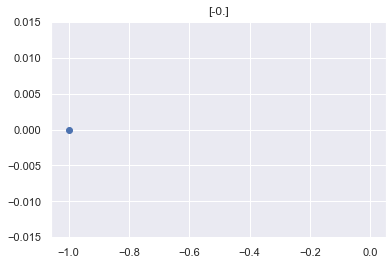

In [65]:
plot_graph(X,y)

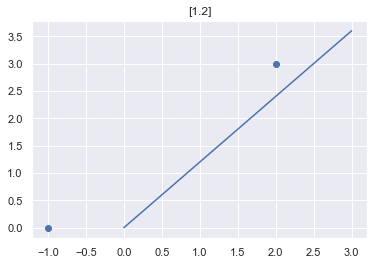

In [67]:
exX, exy = extend_ds_single(X, y, (2, 3))
plot_graph(exX, exy)

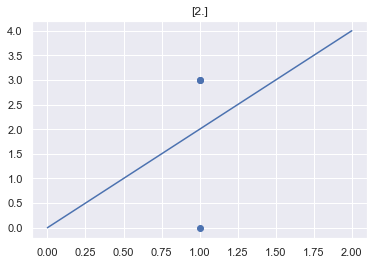

In [47]:
exX, exy = extend_ds_single(exX, exy, (1,3))
plot_graph(exX, exy)

#### So in the above case, did we learn that our original dataset was just (1,0) when we added (1,3) and found our new model to be y = 1.5x?

In [57]:
def converge_same_pt(X, y, pt, n):
    coef = np.zeros(n)
    lm = LinearRegression(fit_intercept=False)
    lm.fit(X, y)
    coef[0] = lm.coef_[0]
    for i in range(1,n):
        X, y = extend_ds_single(X, y, pt)
        lm.fit(X, y)
        coef[i] = lm.coef_[0]
    return coef

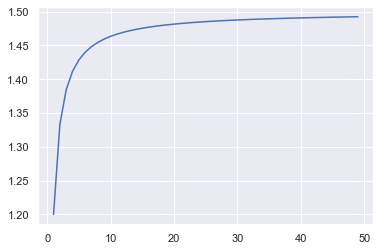

In [60]:
coef = converge_same_pt(X, y, (2,3), 50)
plt.plot([x for x in range(1,50)], coef[1:])

## Motivating ex

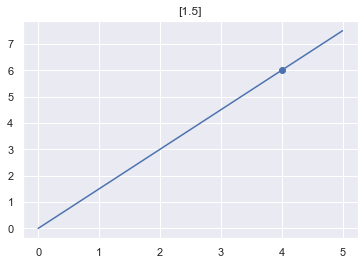

In [107]:
pts = np.array([[4,6]])
X, y = create_dataset(pts)
plot_graph(X, y)

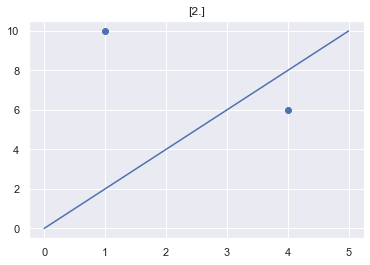

In [108]:
exX, exy = extend_ds_single(X, y, (1,10))
plot_graph(exX, exy)

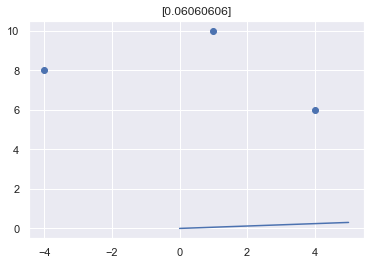

In [109]:
exX, exy = extend_ds_single(exX, exy, (-4,8))
plot_graph(exX, exy)

In [120]:
lm = LinearRegression()

[[0.]]
[6.]


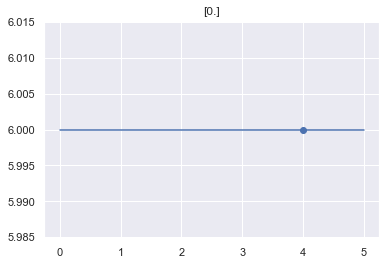

In [130]:
pts = np.array([[4,6]])
X, y = create_dataset(pts)
lm.fit(X, y)
print(lm.coef_)
print(lm.intercept_)
plot_graph(X, y, True)

[[-1.33333333]]
[11.33333333]


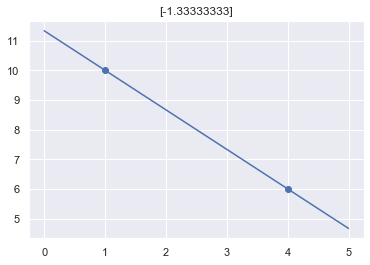

In [131]:
exX, exy = extend_ds_single(X, y, (1,10))
lm.fit(exX, exy)
print(lm.coef_)
print(lm.intercept_)
plot_graph(exX, exy, True)

[[0.]]
[6.]


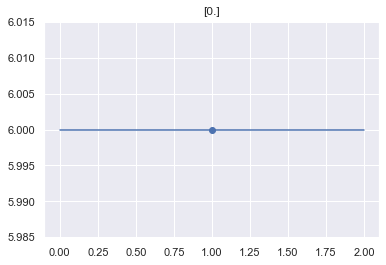

In [132]:
pts = np.array([[1,6]])
X, y = create_dataset(pts)
lm.fit(X, y)
print(lm.coef_)
print(lm.intercept_)
plot_graph(X, y, True)

[[0.]]
[8.]


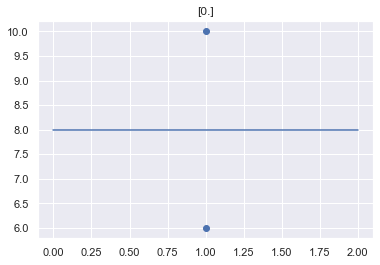

In [134]:
exX, exy = extend_ds_single(X, y, (1,10))
lm.fit(exX, exy)
print(lm.coef_)
print(lm.intercept_)
plot_graph(exX, exy, True)

## D = 2, N = 2, no intercept, we know N

In [160]:
lm = LinearRegression(fit_intercept=False)

In [161]:
pts = np.array([[1,2,10]])
X, y = create_dataset(pts)
lm.fit(X, y)
print(lm.coef_)
#plot_graph(X, y, False)

[[2. 4.]]


In [162]:
exX, exy = extend_ds_multidim(X, y, [6, 8, 2])
lm.fit(exX, exy)
print(lm.coef_)
#plot_graph(exX, exy, False)

[[-19.   14.5]]


In [163]:
exX, exy = extend_ds_multidim(X, y, [9, 8, 2])
lm.fit(exX, exy)
print(lm.coef_)

[[-7.6  8.8]]
